In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from scipy.integrate import quad
from scipy.stats import norm
from tqdm import tqdm

In [2]:
def underlying_asset_price(s_last, T, t, r, sigma):
    w = np.random.normal(0, t / 100)
    return s_last * math.exp(sigma * w)

In [3]:
def d_plus(s_last, sigma, T, t, r, strike): 
    s = underlying_asset_price(s_last, T, t, r, sigma)
    return ((np.log(s / strike)) + (T - t) * (r + (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))

In [4]:
def d_minus(s_last, sigma, T, t, r, strike):
    s = underlying_asset_price(s_last, T, t, r, sigma)
    return ((np.log(s / strike)) + (T - t) * (r - (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))

In [5]:
# цена call option
def price_call_option(s_last, sigma, T, t, r, strike):
    s = underlying_asset_price(s_last, T, t, r, sigma)
    I_plus = norm.cdf(d_plus(s, sigma, T, t, r, strike))
    I_minus = norm.cdf(d_minus(s, sigma, T, t, r, strike))
    ans = s * I_plus - strike * math.exp(-1 * r * (T - t)) * I_minus
    return ans

In [6]:
# delta, partial derivative of x
def delta(s_last, sigma, T, t, r, strike):
    s = underlying_asset_price(s_last, T, t, r, sigma)
    return norm.cdf(d_plus(s, sigma, T, t, r, strike))

In [7]:
def X(s_last, sigma, T, t, r, strike):
    s = underlying_asset_price(s_last, T, t, r, sigma)
    c = price_call_option(s, sigma, T, t, r, strike)
    c_x = delta(s, sigma, T, t, r, strike)
    X = c - c_x * s
    return X

In [8]:
def second_foo(X, t, r):
    return math.exp(r * t) * X

In [9]:
s_last = 2
T = 10
r = 0.1
strike = 1
sigma = 0.1

c = price_call_option(2, sigma, T, 0, r, strike)
c_x = delta(2, sigma, T, 0, r, strike)
X_X = c - c_x * 2

X_values = []
second_value = []

for i in np.linspace(0.0, T, num=1000):
    second_value.append(second_foo(X_X, i, r,))
    X_values.append(X(s_last, sigma, T, i, r, strike))
    s_last = underlying_asset_price(s_last, T, i, r, sigma)

/tmp/ipykernel_3150/2404193110.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return ((np.log(s / strike)) + (T - t) * (r + (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


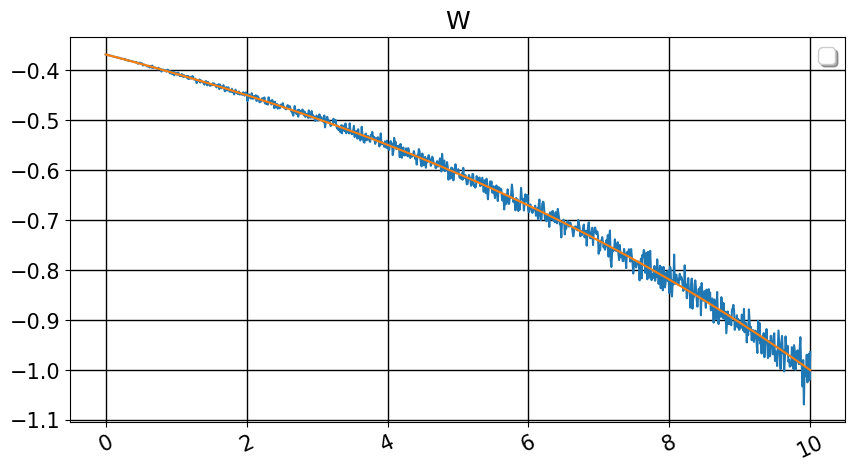

In [10]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0.0, T, num=1000), X_values, label='')
plt.plot(np.linspace(0.0, T, num=1000), second_value, label='')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title('W')
plt.show()